In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.metrics import DistanceMetric, pairwise_distances

In [44]:
data = pd.read_csv("/Users/michaeljeon/Desktop/INST414/Module 4 Assignment/USA_cars_datasets.csv")

clean_data = data.drop(['vin', 'lot', 'condition', 'country', 'state'], axis=1).dropna()

sorted_data = clean_data.sort_values(by=['year', 'mileage'], ascending=[False, True])

print(tabulate(sorted_data.head(20), headers='keys'))

        Unnamed: 0    price  brand      model       year  title_status         mileage  color
----  ------------  -------  ---------  --------  ------  -----------------  ---------  --------
1704          1704    25200  ford       escape      2020  clean vehicle              7  black
1400          1400    26500  ford       van         2020  clean vehicle            122  white
 657           657    22000  chevrolet  trax        2020  clean vehicle            179  gray
2306          2306    19000  nissan     cargo       2020  clean vehicle            264  black
2012          2012    35400  ford       ranger      2020  clean vehicle            671  blue
1701          1701    46900  ford       explorer    2020  clean vehicle            740  gray
1388          1388    17000  ford       fusion      2020  clean vehicle           1117  gray
1714          1714    43900  ford       explorer    2020  clean vehicle           2089  no_color
2088          2088    59900  ford       max         2020  

In [45]:
print(data.isnull().sum())
print(data.dtypes)
print("Duplicates: ", data.duplicated().sum())

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64
Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object
Duplicates:  0


In [ ]:
newest_car = clean_data.loc[
    clean_data.sort_values(by=['year', 'mileage'], ascending=[False, True]).index[0],
    ['year', 'mileage', 'price']
]

print("Newest Car (reference point):")
print(newest_car)

features = clean_data[['year', 'mileage', 'price']].copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_reference = scaler.transform([newest_car.values])

distances = pairwise_distances(scaled_features, scaled_reference, metric='euclidean')

clean_data['euclidean_distance_to_newest'] = distances

print(clean_data[['year', 'mileage', 'price', 'euclidean_distance_to_newest']].head(21))

Newest Car (reference point):
year        2020
mileage      7.0
price      25200
Name: 1704, dtype: object
    year   mileage  price  euclidean_distance_to_newest
0   2008  274117.0   6300                      5.972867
1   2011  190552.0   2899                      4.518351
2   2018   39590.0   5350                      1.860778
3   2014   64146.0  25000                      2.047796
4   2018    6654.0  27700                      0.626598
5   2018   45561.0   5700                      1.873847
6   2010  149050.0   7300                      4.105896
7   2017   23525.0  13350                      1.368151
8   2018    9371.0  14600                      1.062047
9   2017   63418.0   5250                      2.144851
10  2009  107856.0  10400                      3.869152
11  2017   39650.0  12920                      1.492772
12  2018   22909.0  31900                      0.889237
13  2017  138650.0   5430                      2.969445
14  2013  100757.0  20700                      2.6688

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


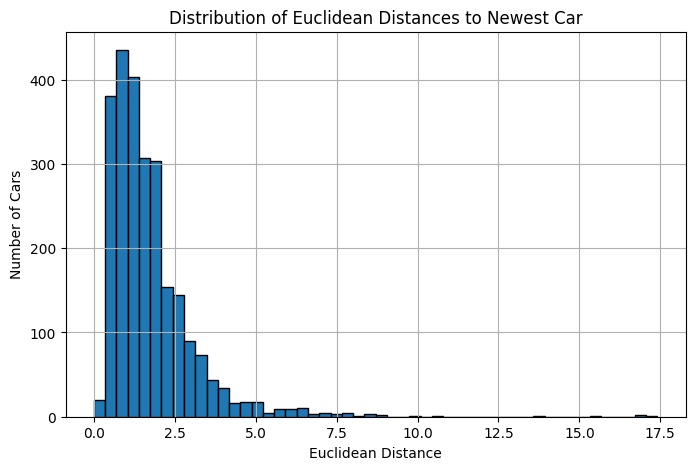

Chosen threshold: 0.4480
Selected k (number of cars similar to newest): 125

Most similar cars to the newest car:
         brand     model  year  mileage  price  euclidean_distance_to_newest
1704      ford    escape  2020      7.0  25200                  1.490116e-08
1400      ford       van  2020    122.0  26500                  1.073341e-01
1676      ford    fusion  2020   2452.0  23400                  1.541343e-01
2268    nissan    armada  2020  10317.0  25500                  1.744819e-01
58    chrysler  pacifica  2020   2473.0  23000                  1.862522e-01
...        ...       ...   ...      ...    ...                           ...
1910      ford     f-150  2019  19793.0  26000                  4.456853e-01
1567      ford      flex  2019  19147.0  26500                  4.457958e-01
1796      ford     f-150  2019  16725.0  22900                  4.459755e-01
1500      ford     f-150  2019  16506.0  22800                  4.472757e-01
1251      ford      flex  2019  18279.0

In [54]:
distances = clean_data['euclidean_distance_to_newest'].values

plt.figure(figsize=(8,5))
plt.hist(distances, bins=50, edgecolor='black')
plt.title("Distribution of Euclidean Distances to Newest Car")
plt.xlabel("Euclidean Distance")
plt.ylabel("Number of Cars")
plt.grid(True)
plt.show()

threshold = np.percentile(distances, 5)

print(f"Chosen threshold: {threshold:.4f}")

k = np.sum(distances <= threshold)
print(f"Selected k (number of cars similar to newest): {k}")

similar_cars = clean_data[distances <= threshold].sort_values('euclidean_distance_to_newest')

print("\nMost similar cars to the newest car:")
print(similar_cars[['brand', 'model', 'year', 'mileage', 'price', 'euclidean_distance_to_newest']])


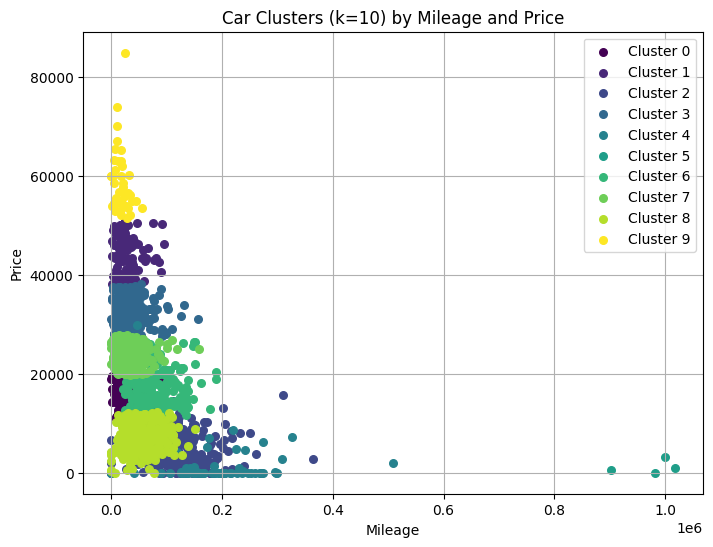


Cluster Summary (Average Values):
            year    mileage     price
cluster                              
0        2018.44   30575.61  15544.41
1        2018.31   29208.66  44043.54
2        2012.41  126078.44   4389.91
3        2017.93   29795.25  31693.47
4        2001.47  187989.25   1782.00
5        2011.00  975615.50   1175.00
6        2014.72   78461.84  17005.10
7        2018.16   27934.21  24030.29
8        2017.04   51200.85   7542.14
9        2018.07   17672.66  58496.18


In [59]:
features = clean_data[['year', 'mileage', 'price']].copy()

features_norm = (features - features.min()) / (features.max() - features.min())

kmeans = KMeans(n_clusters=k, random_state=42)
clean_data['cluster'] = kmeans.fit_predict(features_norm)

plt.figure(figsize=(8,6))
colors = plt.cm.viridis(np.linspace(0, 1, k))

for i in range(k):
    cluster_points = clean_data[clean_data['cluster'] == i]
    plt.scatter(cluster_points['mileage'], cluster_points['price'], s=30, color=colors[i], label=f'Cluster {i}')

plt.title(f"Car Clusters (k={k}) by Mileage and Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

cluster_summary = clean_data.groupby('cluster')[['year', 'mileage', 'price']].mean().round(2)
print("\nCluster Summary (Average Values):")
print(cluster_summary)